<a href="https://colab.research.google.com/github/Srabanisarkar/Iris/blob/main/BANKNOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
read_file=pd.read_csv("/content/drive/MyDrive/DATASET/BankNoteAuthentication.csv")
read_file

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
read_file.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
read_file.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [5]:
read_file['class']

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [6]:
read_file.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [7]:
X=read_file.drop('class',axis=1)
Y=read_file['class']
Y.shape   

(1372,)

In [8]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [9]:
corr=X.corr()
corr.shape

(4, 4)

<Axes: >

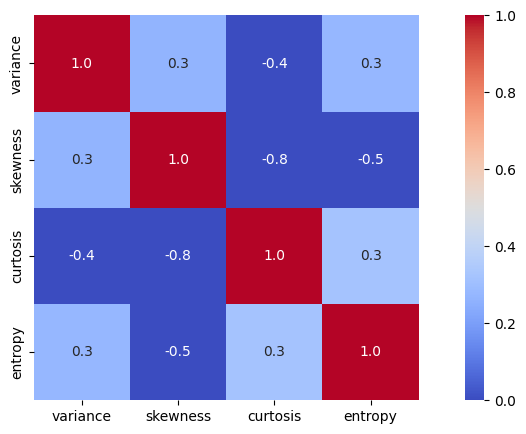

In [10]:
plt.figure(figsize=(12,5))
sns.heatmap(corr,vmin=0,vmax=1,annot=True,fmt=".1f",cmap='coolwarm',cbar=True,square= True)

In [11]:
# with the following features we can find highly correlated features
def correlation(dataset,threshold):
    col_corr=set()
    corr=dataset.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j])>threshold:
                colname=corr.columns[i]
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features=correlation(X,0.2)
print(corr_features)

{'entropy', 'curtosis', 'skewness'}


In [13]:
X_new=X.drop(corr_features,axis=1)
X_new

,variance
0,3.62160
1,4.54590
2,3.86600
3,3.45660
4,0.32924
...,...
1367,0.40614
1368,-1.38870
1369,-3.75030
1370,-3.56370


In [14]:
from sklearn.model_selection import train_test_split
X_new_train,X_new_test,Y_train,Y_test=train_test_split(X_new,Y,test_size=.25,random_state=2)
Y_test.shape

(343,)

In [15]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_new_train,Y_train)

LogisticRegression()

In [16]:
X_new.head()

,variance
0,3.62160
1,4.54590
2,3.86600
3,3.45660
4,0.32924


In [17]:
predicted_lr=lr.predict(X_new_test)
print(predicted_lr)

[0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0
 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0
 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1
 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1
 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1
 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1
 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0
 0 0 1 0 1 0 0 0 0 0]


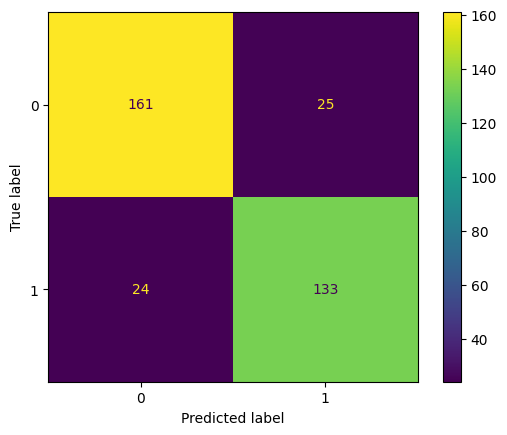

In [18]:
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay
lr_cm=metrics.confusion_matrix(Y_test,predicted_lr)
cmd=ConfusionMatrixDisplay(lr_cm,display_labels=['0','1'])
cmd.plot()

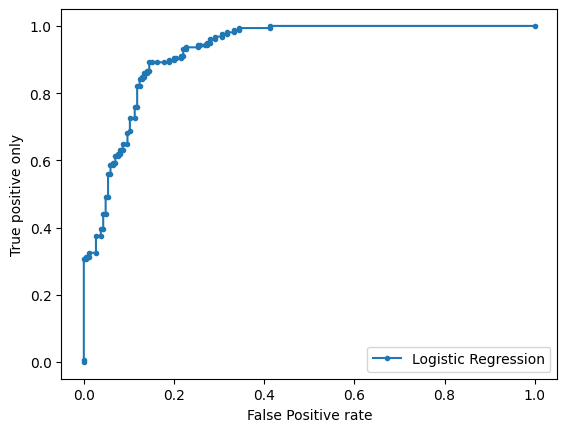

In [19]:
from sklearn.metrics import roc_curve
lr_probs=lr.predict_proba(X_new_test)
lr_probs=lr_probs[:,1]
lr_fpr,lr_tpr,_=roc_curve(Y_test,lr_probs)
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')
plt.xlabel('False Positive rate')
plt.ylabel('True positive only')
plt.legend()
plt.show()

In [20]:
lr_accuracy=metrics.accuracy_score(Y_test,predicted_lr)
print(lr_accuracy)

0.8571428571428571


NAIVE BAYES

In [21]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(X_new_train,Y_train)

GaussianNB()

In [22]:
predicted_naive=naive.predict(X_new_test)

In [23]:
import sklearn.metrics as metrics
cm_naive=metrics.confusion_matrix(Y_test,predicted_naive)
accuracy_naive=metrics.accuracy_score(Y_test,predicted_naive)
print(accuracy_naive)

0.8600583090379009


In [24]:
print(cm_naive)

[[161  25]
 [ 23 134]]


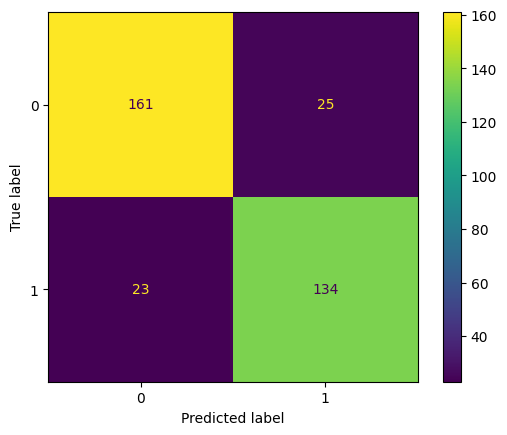

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd=ConfusionMatrixDisplay(cm_naive,display_labels=['0','1'])
cmd.plot()